## 1. 분석의 목적과 변수 확인

In [13]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 불러오기, 동일경로
titanic_df = pd.read_csv("./train.csv")

In [3]:
# 상위 5개 데이터 확인

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 각 column의 데이터 타입 확인

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 확인하기

In [6]:
# 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe() #수치형 데이터에 대한 요약만을 제공

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 상관계수 확인
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
# 결측치 확인

titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기
### 1. Survived Column

In [19]:
# 생존자, 사망자 명수는?

titanic_df['Survived'].sum()

342

In [20]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

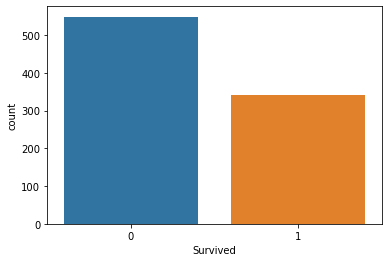

In [21]:
# 생존자 수와 사망자 수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x ='Survived', data=titanic_df)
plt.show()

### 2.Pclass

In [22]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [23]:
#Pclass별 탑승인원
titanic_df[['Pclass','Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [24]:
# 생존자 인원?
titanic_df[['Pclass','Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [25]:
# 생존률?
titanic_df[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


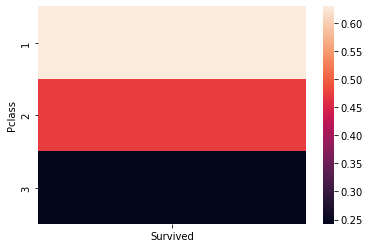

In [26]:
# 히트맵 활용
sns.heatmap(titanic_df[['Pclass','Survived']].groupby('Pclass').mean())
plt.show()

### Sex

In [27]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [28]:
titanic_df.groupby(['Survived','Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [30]:
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

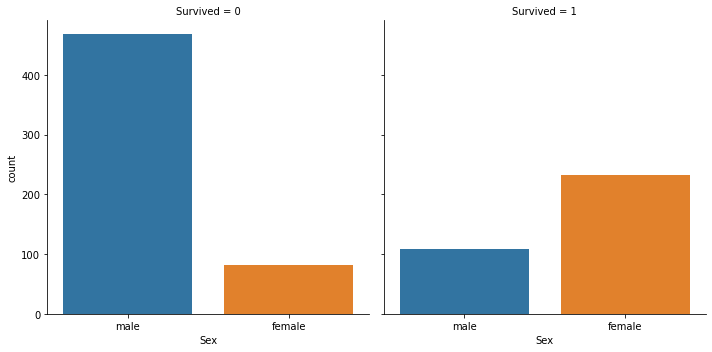

In [31]:
# sns.catplot
sns.catplot(x='Sex', col='Survived', kind='count',data=titanic_df)

### Age

In [32]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

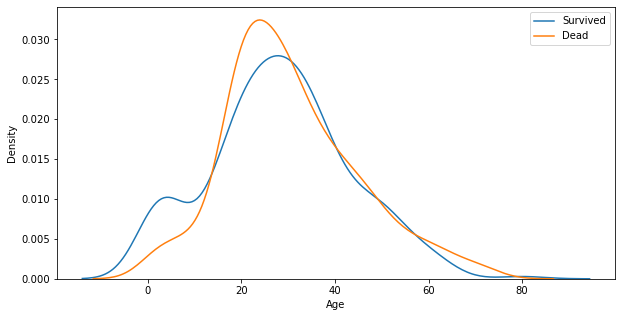

In [34]:
# survived 1, 0과 Age의 경향성
# figure(도면) -> axis(틀) -> plot

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]['Age'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'],ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

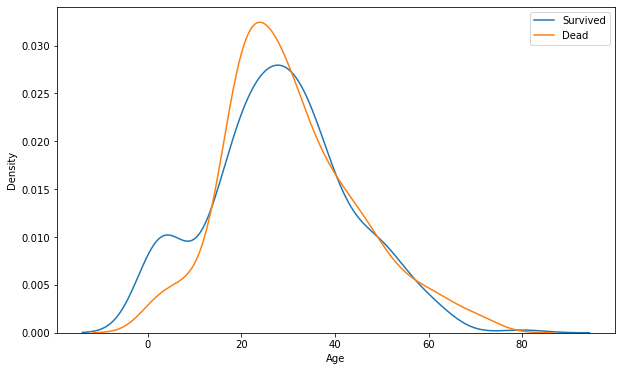

In [36]:
#위의 subplots를 사용하지 않아도 그래프를 중복해서 그릴 수 있다.
plt.figure(figsize=(10,6))
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]['Age'])
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'])
plt.legend(['Survived', 'Dead'])
plt.show()

### Appendix I.Pclass + Sex vs Survived

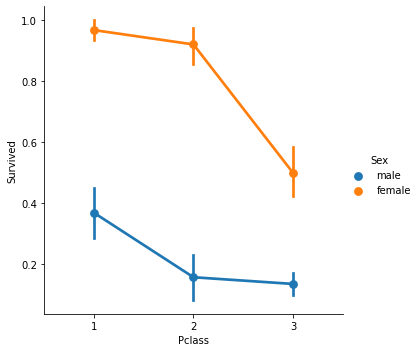

In [37]:
# 복합적인 요소에 대해 분석 진행
# 성별과 pclass, survived
# 각 점은 추정치

sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point',data=titanic_df)
plt.show()

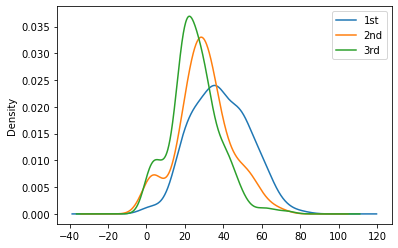

In [38]:
# Age graph with pclass

titanic_df['Age'][titanic_df.Pclass==1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==3].plot(kind='kde')
plt.legend(['1st','2nd','3rd'])
plt.show()